In [32]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns



In [33]:
df = pd.read_csv("nba_games.csv")
df.dropna(inplace=True)

print(df['home'].dtype)
print(df['season'].dtype)
df['season'] = df['season'].astype(int)
# Count NaN values in the 'ortg' and 'won' columns
nan_count_ortg = df['ortg'].isna().sum()
nan_count_won = df['won'].isna().sum()
df.dropna(inplace=True)

C:\Users\WillR\AppData\Local\Temp\ipykernel_25940\271399869.py:1: DtypeWarning: Columns (25,41,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("nba_games.csv")


float64
float64


In [34]:

hawks_df = df[(df.team == 'ATL') & (df.season == 2022)]
remaining = df[(df.team !=  'ATL') & (df.season == 2022)]
print(hawks_df)
print(remaining)
#ponts, home away, fg, fga


       Unnamed: 0       Id    fg   fga    3p   3pa    ft   fta   orb   drb  \
198           198    198.0  47.0  86.0  17.0  35.0  21.0  26.0  13.0  27.0   
438           438    438.0  45.0  88.0  12.0  26.0  22.0  24.0   8.0  36.0   
486           486    486.0  31.0  74.0   8.0  25.0  24.0  28.0  12.0  30.0   
590           590    590.0  45.0  90.0  18.0  33.0  22.0  28.0  13.0  34.0   
742           742    742.0  43.0  93.0   9.0  29.0  19.0  21.0  13.0  27.0   
...           ...      ...   ...   ...   ...   ...   ...   ...   ...   ...   
17286       17286  17286.0  40.0  96.0   8.0  30.0  14.0  17.0  21.0  34.0   
17435       17435  17435.0  41.0  89.0  12.0  31.0  14.0  20.0   9.0  34.0   
17538       17538  17538.0  38.0  82.0  17.0  43.0  20.0  26.0   3.0  32.0   
17635       17635  17635.0  31.0  76.0  10.0  28.0  24.0  30.0  11.0  36.0   
17748       17748  17748.0  44.0  86.0  16.0  33.0  10.0  12.0   7.0  34.0   

       ...  3par_max  ftr_max  ortg_max  drtg_max  team  total 

In [35]:
#Operatiosn to perform, get the plus ansd minus for each stat,
#Descriptive Stats for Teaam points per home and away game, vs Legue points per home and away game
#Run for blk, and tov fg, orb, drb, stl, ast

hawks_df = df[(df.team == 'ATL') & (df.season == 2022)]
remaining = df[(df.team !=  'ATL') & (df.season == 2022)]
print(hawks_df)
print(remaining)



       Unnamed: 0       Id    fg   fga    3p   3pa    ft   fta   orb   drb  \
198           198    198.0  47.0  86.0  17.0  35.0  21.0  26.0  13.0  27.0   
438           438    438.0  45.0  88.0  12.0  26.0  22.0  24.0   8.0  36.0   
486           486    486.0  31.0  74.0   8.0  25.0  24.0  28.0  12.0  30.0   
590           590    590.0  45.0  90.0  18.0  33.0  22.0  28.0  13.0  34.0   
742           742    742.0  43.0  93.0   9.0  29.0  19.0  21.0  13.0  27.0   
...           ...      ...   ...   ...   ...   ...   ...   ...   ...   ...   
17286       17286  17286.0  40.0  96.0   8.0  30.0  14.0  17.0  21.0  34.0   
17435       17435  17435.0  41.0  89.0  12.0  31.0  14.0  20.0   9.0  34.0   
17538       17538  17538.0  38.0  82.0  17.0  43.0  20.0  26.0   3.0  32.0   
17635       17635  17635.0  31.0  76.0  10.0  28.0  24.0  30.0  11.0  36.0   
17748       17748  17748.0  44.0  86.0  16.0  33.0  10.0  12.0   7.0  34.0   

       ...  3par_max  ftr_max  ortg_max  drtg_max  team  total 

In [36]:
#Boxplot of the game wise defensive and offensive ratings against the rest of the league.

In [37]:

mean_as_hawks = hawks_df.loc[(hawks_df['home'] == 0.0) & (hawks_df['season'] == 2022),'total'].describe()
mean_hs_hawks = hawks_df.loc[(hawks_df['home'] == 1.0) & (hawks_df['season'] == 2022),'total'].describe()
print(mean_as_hawks)
print(mean_hs_hawks)
mean_as_remaining = remaining.loc[(remaining['home'] == 0.0) & (remaining['season'] == 2022),'total'].describe()
mean_hs_remaining = remaining.loc[(remaining['home'] == 1.0) & (remaining['season'] == 2022),'total'].describe()
print(mean_as_remaining)
print(mean_hs_remaining)
# Calculate the plus-minus values
plus_minus_as = mean_as_hawks - mean_as_remaining
plus_minus_hs = mean_hs_hawks - mean_hs_remaining

# Print the values side by side
# Print the values side by side, comparing against the league average
print(f'Hawks Away Points Average: {mean_as_hawks:.2f}, +/- vs League Average: {plus_minus_as:.2f}')
print(f'Hawks Home Points Average: {mean_hs_hawks:.2f}, +/- vs League Average: {plus_minus_hs:.2f}')



count     45.000000
mean     110.155556
std       12.576955
min       87.000000
25%       98.000000
50%      110.000000
75%      117.000000
max      136.000000
Name: total, dtype: float64
count     44.000000
mean     116.181818
std       12.272625
min       86.000000
25%      110.000000
50%      119.000000
75%      124.500000
max      134.000000
Name: total, dtype: float64
count    1278.000000
mean      109.351330
std        12.735403
min        75.000000
25%       101.000000
50%       109.000000
75%       117.000000
max       158.000000
Name: total, dtype: float64
count    1279.000000
mean      111.096169
std        12.403719
min        77.000000
25%       103.000000
50%       111.000000
75%       119.000000
max       153.000000
Name: total, dtype: float64


TypeError: unsupported format string passed to Series.__format__

In [ ]:
#Calculate the + and - between the hawks and the league aaverage, then it should be formatted as a table, this will be the hard part but it should be able to be completed soon
#columns to cover blh, tov, fg, orb, drb, stl, ast
mean_as_hawks = hawks_df.loc[(hawks_df['home'] == 0.0) & (hawks_df['season'] == 2022),'blk'].mean()
mean_hs_hawks = hawks_df.loc[(hawks_df['home'] == 1.0) & (hawks_df['season'] == 2022),'blk'].mean()
print(mean_as_hawks)
print(mean_hs_hawks)
mean_as_remaining = remaining.loc[(remaining['home'] == 0.0) & (remaining['season'] == 2022),'blk'].mean()
mean_hs_remaining = remaining.loc[(remaining['home'] == 1.0) & (remaining['season'] == 2022),'blk'].mean()
print(mean_as_remaining)
print(mean_hs_remaining)

# Calculate the plus-minus values
plus_minus_as = mean_as_hawks - mean_as_remaining
plus_minus_hs = mean_hs_hawks - mean_hs_remaining

# Print the values side by side
# Print the values side by side, comparing against the league average
print(f'Hawks Away blk Average: {mean_as_hawks:.2f}, +/- vs League Average: {plus_minus_as:.2f}')
print(f'Hawks Home blk Average: {mean_hs_hawks:.2f}, +/- vs League Average: {plus_minus_hs:.2f}')

3.7333333333333334
4.568181818181818
4.5641627543036
4.875684128225176
Hawks Away blk Average: 3.73, +/- vs League Average: -0.83
Hawks Home blk Average: 4.57, +/- vs League Average: -0.31


In [ ]:
mean_as_hawks = hawks_df.loc[(hawks_df['home'] == 0.0) & (hawks_df['season'] == 2022),'tov'].mean()
mean_hs_hawks = hawks_df.loc[(hawks_df['home'] == 1.0) & (hawks_df['season'] == 2022),'tov'].mean()
print(mean_as_hawks)
print(mean_hs_hawks)
mean_as_remaining = remaining.loc[(remaining['home'] == 0.0) & (remaining['season'] == 2022),'tov'].mean()
mean_hs_remaining = remaining.loc[(remaining['home'] == 1.0) & (remaining['season'] == 2022),'tov'].mean()
print(mean_as_remaining)
print(mean_hs_remaining)
# Calculate the plus-minus values
plus_minus_as = mean_as_hawks - mean_as_remaining
plus_minus_hs = mean_hs_hawks - mean_hs_remaining

# Print the values side by side
# Print the values side by side, comparing against the league average
print(f'Hawks Away Turnovers Average: {mean_as_hawks:.2f}, +/- vs League Average: {plus_minus_as:.2f}')
print(f'Hawks Home Turnovers Average: {mean_hs_hawks:.2f}, +/- vs League Average: {plus_minus_hs:.2f}')


11.955555555555556
11.159090909090908
13.2339593114241
12.954652071931196
Hawks Away Turnovers Average: 11.96, +/- vs League Average: -1.28
Hawks Home Turnovers Average: 11.16, +/- vs League Average: -1.80


In [ ]:
mean_as_hawks = hawks_df.loc[(hawks_df['home'] == 0.0) & (hawks_df['season'] == 2022),'fg'].mean()
mean_hs_hawks = hawks_df.loc[(hawks_df['home'] == 1.0) & (hawks_df['season'] == 2022),'fg'].mean()
print(mean_as_hawks)
print(mean_hs_hawks)
mean_as_remaining = remaining.loc[(remaining['home'] == 0.0) & (remaining['season'] == 2022),'fg'].mean()
mean_hs_remaining = remaining.loc[(remaining['home'] == 1.0) & (remaining['season'] == 2022),'fg'].mean()
print(mean_as_remaining)
print(mean_hs_remaining)
# Calculate the plus-minus values
plus_minus_as = mean_as_hawks - mean_as_remaining
plus_minus_hs = mean_hs_hawks - mean_hs_remaining

# Print the values side by side
# Print the values side by side, comparing against the league average
print(f'Hawks Away fg Average: {mean_as_hawks:.2f}, +/- vs League Average: {plus_minus_as:.2f}')
print(f'Hawks Home fg Average: {mean_hs_hawks:.2f}, +/- vs League Average: {plus_minus_hs:.2f}')

40.51111111111111
41.77272727272727
40.104851330203445
40.756841282251756
Hawks Away fg Average: 40.51, +/- vs League Average: 0.41
Hawks Home fg Average: 41.77, +/- vs League Average: 1.02


In [ ]:
mean_as_hawks = hawks_df.loc[(hawks_df['home'] == 0.0) & (hawks_df['season'] == 2022),'orb'].mean()
mean_hs_hawks = hawks_df.loc[(hawks_df['home'] == 1.0) & (hawks_df['season'] == 2022),'orb'].mean()
print(mean_as_hawks)
print(mean_hs_hawks)
mean_as_remaining = remaining.loc[(remaining['home'] == 0.0) & (remaining['season'] == 2022),'orb'].mean()
mean_hs_remaining = remaining.loc[(remaining['home'] == 1.0) & (remaining['season'] == 2022),'orb'].mean()
print(mean_as_remaining)
print(mean_hs_remaining)
# Calculate the plus-minus values
plus_minus_as = mean_as_hawks - mean_as_remaining
plus_minus_hs = mean_hs_hawks - mean_hs_remaining

# Print the values side by side
# Print the values side by side, comparing against the league average
print(f'Hawks Away Offensive Rebound Average: {mean_as_hawks:.2f}, +/- vs League Average: {plus_minus_as:.2f}')
print(f'Hawks Home Offensive Rebound Average: {mean_hs_hawks:.2f}, +/- vs League Average: {plus_minus_hs:.2f}')

10.6
9.340909090909092
10.21283255086072
10.349491790461299


In [ ]:
mean_as_hawks = hawks_df.loc[(hawks_df['home'] == 0.0) & (hawks_df['season'] == 2022),'drb'].mean()
mean_hs_hawks = hawks_df.loc[(hawks_df['home'] == 1.0) & (hawks_df['season'] == 2022),'drb'].mean()
print(mean_as_hawks)
print(mean_hs_hawks)
mean_as_remaining = remaining.loc[(remaining['home'] == 0.0) & (remaining['season'] == 2022),'drb'].mean()
mean_hs_remaining = remaining.loc[(remaining['home'] == 1.0) & (remaining['season'] == 2022),'drb'].mean()
print(mean_as_remaining)
print(mean_hs_remaining)
# Calculate the plus-minus values
plus_minus_as = mean_as_hawks - mean_as_remaining
plus_minus_hs = mean_hs_hawks - mean_hs_remaining

# Print the values side by side
# Print the values side by side, comparing against the league average
print(f'Hawks Away Defensive Rebound Average: {mean_as_hawks:.2f}, +/- vs League Average: {plus_minus_as:.2f}')
print(f'Hawks Home Defensive Rebound Average: {mean_hs_hawks:.2f}, +/- vs League Average: {plus_minus_hs:.2f}')

33.4
34.27272727272727
33.76369327073552
34.28146989835809


In [ ]:
mean_as_hawks = hawks_df.loc[(hawks_df['home'] == 0.0) & (hawks_df['season'] == 2022),'stl'].mean()
mean_hs_hawks = hawks_df.loc[(hawks_df['home'] == 1.0) & (hawks_df['season'] == 2022),'stl'].mean()
print(mean_as_hawks)
print(mean_hs_hawks)
mean_as_remaining = remaining.loc[(remaining['home'] == 0.0) & (remaining['season'] == 2022),'stl'].mean()
mean_hs_remaining = remaining.loc[(remaining['home'] == 1.0) & (remaining['season'] == 2022),'stl'].mean()
print(mean_as_remaining)
print(mean_hs_remaining)
# Calculate the plus-minus values
plus_minus_as = mean_as_hawks - mean_as_remaining
plus_minus_hs = mean_hs_hawks - mean_hs_remaining

# Print the values side by side
# Print the values side by side, comparing against the league average
print(f'Hawks Away stl Average: {mean_as_hawks:.2f}, +/- vs League Average: {plus_minus_as:.2f}')
print(f'Hawks Home stl Average: {mean_hs_hawks:.2f}, +/- vs League Average: {plus_minus_hs:.2f}')

6.533333333333333
7.545454545454546
7.61658841940532
7.598123534010946
Hawks Away stl Average: 6.53, +/- vs League Average: -1.08
Hawks Home stl Average: 7.55, +/- vs League Average: -0.05


In [ ]:
mean_as_hawks = hawks_df.loc[(hawks_df['home'] == 0.0) & (hawks_df['season'] == 2022),'ast'].mean()
mean_hs_hawks = hawks_df.loc[(hawks_df['home'] == 1.0) & (hawks_df['season'] == 2022),'ast'].mean()
print(mean_as_hawks)
print(mean_hs_hawks)
mean_as_remaining = remaining.loc[(remaining['home'] == 0.0) & (remaining['season'] == 2022),'ast'].mean()
mean_hs_remaining = remaining.loc[(remaining['home'] == 1.0) & (remaining['season'] == 2022),'ast'].mean()
print(mean_as_remaining)
print(mean_hs_remaining)

# Calculate the plus-minus values
plus_minus_as = mean_as_hawks - mean_as_remaining
plus_minus_hs = mean_hs_hawks - mean_hs_remaining

# Print the values side by side
# Print the values side by side, comparing against the league average
print(f'Hawks Away Assist Average: {mean_as_hawks:.2f}, +/- vs League Average: {plus_minus_as:.2f}')
print(f'Hawks Home Assist Average: {mean_hs_hawks:.2f}, +/- vs League Average: {plus_minus_hs:.2f}')

23.355555555555554
25.113636363636363
24.120500782472615
24.947615324472245
Hawks Away Assist Average: 23.36, +/- vs League Average: -0.76
Hawks Home Assist Average: 25.11, +/- vs League Average: 0.17


In [ ]:
mean_as_hawks = hawks_df.loc[(hawks_df['home'] == 0.0) & (hawks_df['season'] == 2022),'pf'].mean()
mean_hs_hawks = hawks_df.loc[(hawks_df['home'] == 1.0) & (hawks_df['season'] == 2022),'pf'].mean()
print(mean_as_hawks)
print(mean_hs_hawks)
mean_as_remaining = remaining.loc[(remaining['home'] == 0.0) & (remaining['season'] == 2022),'pf'].mean()
mean_hs_remaining = remaining.loc[(remaining['home'] == 1.0) & (remaining['season'] == 2022),'pf'].mean()
print(mean_as_remaining)
print(mean_hs_remaining)

# Calculate the plus-minus values
plus_minus_as = mean_as_hawks - mean_as_remaining
plus_minus_hs = mean_hs_hawks - mean_hs_remaining

# Print the values side by side
# Print the values side by side, comparing against the league average
print(f'Hawks Away Average Fouls: {mean_as_hawks:.2f}, +/- vs League Average: {plus_minus_as:.2f}')
print(f'Hawks Home Average Fouls: {mean_hs_hawks:.2f}, +/- vs League Average: {plus_minus_hs:.2f}')


18.755555555555556
19.136363636363637
19.85133020344288
19.745895230648944
Hawks Away Average Fouls: 18.76, +/- vs League Average: -1.10
Hawks Home Average Fouls: 19.14, +/- vs League Average: -0.61


In [ ]:
mean_as_hawks = hawks_df.loc[(hawks_df['home'] == 0.0) & (hawks_df['season'] == 2022),'3p'].mean()
mean_hs_hawks = hawks_df.loc[(hawks_df['home'] == 1.0) & (hawks_df['season'] == 2022),'3p'].mean()
print(mean_as_hawks)
print(mean_hs_hawks)
mean_as_remaining = remaining.loc[(remaining['home'] == 0.0) & (remaining['season'] == 2022),'3p'].mean()
mean_hs_remaining = remaining.loc[(remaining['home'] == 1.0) & (remaining['season'] == 2022),'3p'].mean()
print(mean_as_remaining)
print(mean_hs_remaining)
# Calculate the plus-minus values
plus_minus_as = mean_as_hawks - mean_as_remaining
plus_minus_hs = mean_hs_hawks - mean_hs_remaining

# Print the values side by side
# Print the values side by side, comparing against the league average
print(f'Hawks Away 3P Average: {mean_as_hawks:.2f}, +/- vs League Average: {plus_minus_as:.2f}')
print(f'Hawks Home 3P Average: {mean_hs_hawks:.2f}, +/- vs League Average: {plus_minus_hs:.2f}')

12.177777777777777
13.409090909090908
12.269953051643192
12.548084440969507
Hawks Away 3P Average: 12.18, +/- vs League Average: -0.09
Hawks Home 3P Average: 13.41, +/- vs League Average: 0.86


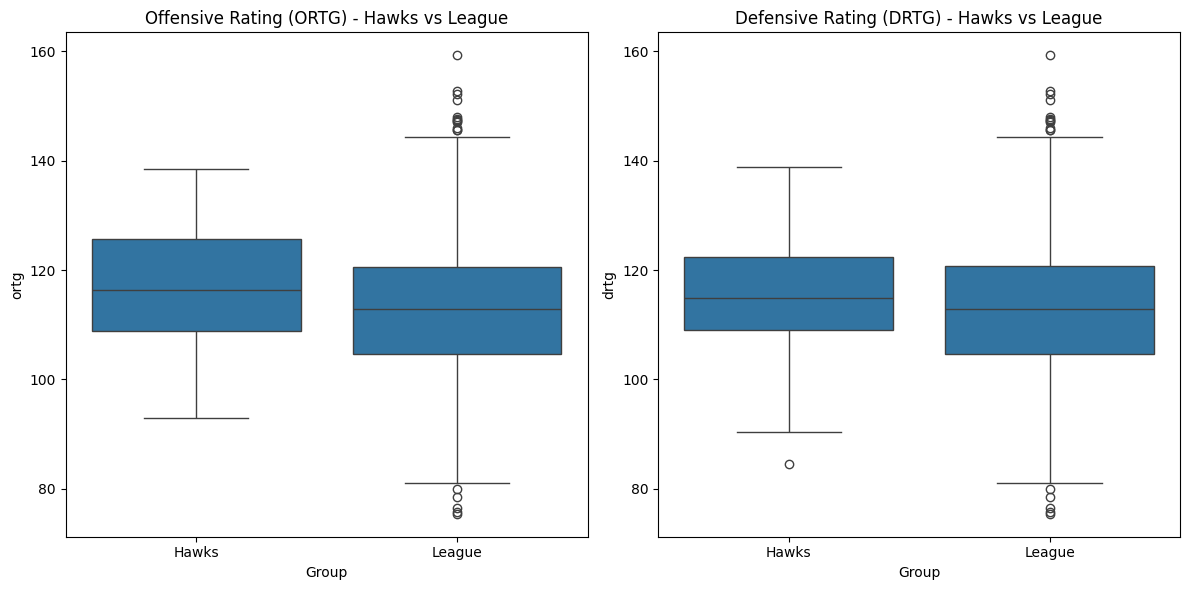

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming hawks_df and remaining have already been defined as per your code snippet
# Filter the DataFrame for the 2022 season
hawks_df = df[(df['team'] == 'ATL') & (df['season'] == 2022)]
remaining = df[(df['team'] != 'ATL') & (df['season'] == 2022)]

# Create a new DataFrame for plotting that combines the two groups
combined_df = pd.concat([hawks_df.assign(Group='Hawks'), remaining.assign(Group='League')])

# Create the boxplots for 'ortg' and 'drtg'
plt.figure(figsize=(12, 6))

# Boxplot for 'ortg'
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(x='Group', y='ortg', data=combined_df)
plt.title('Offensive Rating (ORTG) - Hawks vs League')

# Boxplot for 'drtg'
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(x='Group', y='drtg', data=combined_df)
plt.title('Defensive Rating (DRTG) - Hawks vs League')

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()


In [ ]:
print(f"Number of NaN values in 'ortg': {nan_count_ortg}")
print(f"Number of NaN values in 'won': {nan_count_won}")

Number of NaN values in 'ortg': 0
Number of NaN values in 'won': 0
